# DataSeer Grab Challenge 2017
### By Sapphire

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline

In [189]:
#import the data
df = pd.read_csv('grab.csv', parse_dates=True)

## Filter data for anomalies/outliers

In [190]:
#ignore data with pick-up or drop-off locations outside the philippines
df = df[(df['pick_up_latitude'] <20) & (df['pick_up_latitude'] >5)]
df = df[(df['pick_up_longitude'] <127) & (df['pick_up_longitude'] >117)]
df = df[(df['drop_off_latitude'] <20) & (df['drop_off_latitude'] >5)]
df = df[(df['drop_off_longitude'] <127) & (df['drop_off_longitude'] >117)]
df = df.drop(114833)
df = df[df['fare']<5000]

IOS    153391
ADR     98670
T47      6357
VNU      6131
WIN       479
BBA        15
Name: source, dtype: int64


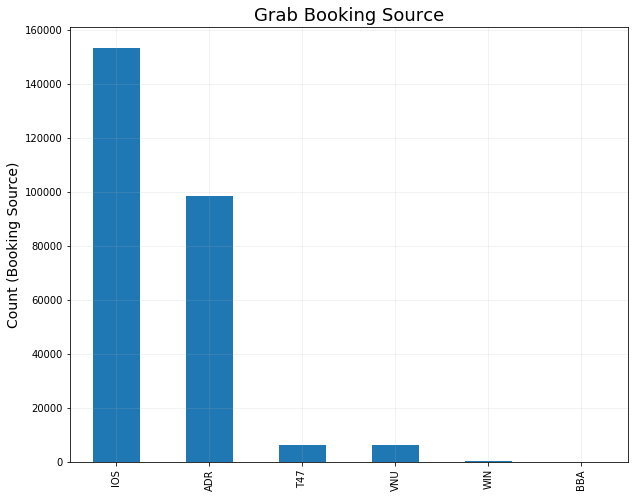

In [191]:
print(df.source.value_counts())
df.source.value_counts().plot(kind='bar', figsize=(10,8))
plt.grid(True, alpha=0.2)
plt.title('Grab Booking Source', fontsize=18)
plt.ylabel('Count (Booking Source)', fontsize=14);

# iPhone and Android are the major channels used for booking

Metro Manila    264352
Cebu               580
Davao              111
Name: city, dtype: int64


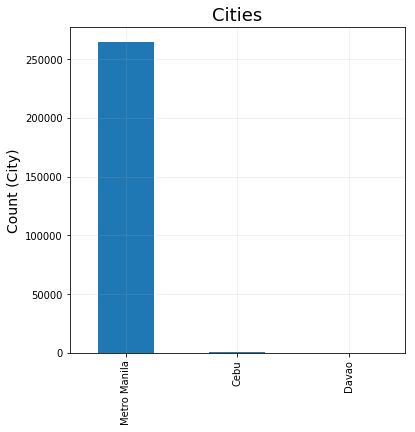

In [192]:
print(df.city.value_counts())
df.city.value_counts().plot(kind='bar', figsize=(6,6))
plt.grid(True, alpha=0.2)
plt.title('Cities', fontsize=18)
plt.ylabel('Count (City)', fontsize=14);

# Most bookings were done in Metro Manila

UNALLOCATED    120515
COMPLETED      114577
CANCELLED       29951
Name: state, dtype: int64


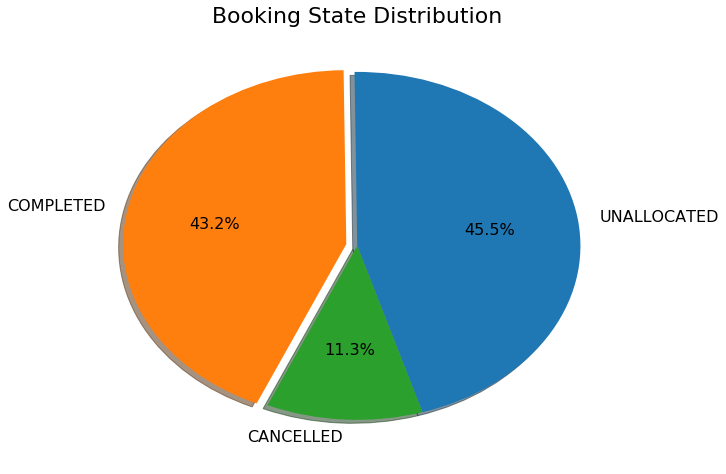

In [193]:
print(df.state.value_counts())
mpl.rcParams['font.size'] = 16
plt.figure(figsize=(10,8))
val = list(df.state.value_counts())
label = list(df.state.value_counts().index)
explode=(0.0, 0.05, 0.0)
plt.pie(val, labels=label, autopct='%1.1f%%', explode=explode, shadow=True, startangle=287)
plt.title('Booking State Distribution', fontsize=22);

# <font color='668cff'><div style="text-align: justify"> Allocation Rate (Completed + Cancelled) is 54.5% and Actual Allocation Rate is 43.3%

# <font color='668cff'><div style="text-align: justify"> Unallocated and cancelled bookings could be considered as lost opportunity. The goal is to improve "Completed" booking transactions and reduce "Unallocated" and "Cancelled" bookings. </font></div>


In [194]:
#Create new Columns for hour and weekday
df['created_at_local'] = pd.to_datetime(df['created_at_local'])
df['day_of_week_num'] = df['created_at_local'].dt.dayofweek
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_week'] = df['day_of_week_num'].apply(lambda x:days[x])
df['hour_of_day'] = df['created_at_local'].dt.hour

In [195]:
comp = df.pivot_table(index=['hour_of_day', 'state'], values='city', aggfunc='count')
df_hour = comp.to_frame()
df_hour = df_hour.unstack(level='state')
df_hour['AAR'] = 100*df_hour['city', 'COMPLETED']/(df_hour['city', 'CANCELLED'] + df_hour['city', 'COMPLETED'] + 
                                               df_hour['city', 'UNALLOCATED'])
df_hour['AR'] = 100*(df_hour['city', 'COMPLETED'] + df_hour['city', 'CANCELLED']) /(df_hour['city', 'CANCELLED'] + 
                                               df_hour['city', 'COMPLETED'] + df_hour['city', 'UNALLOCATED'])

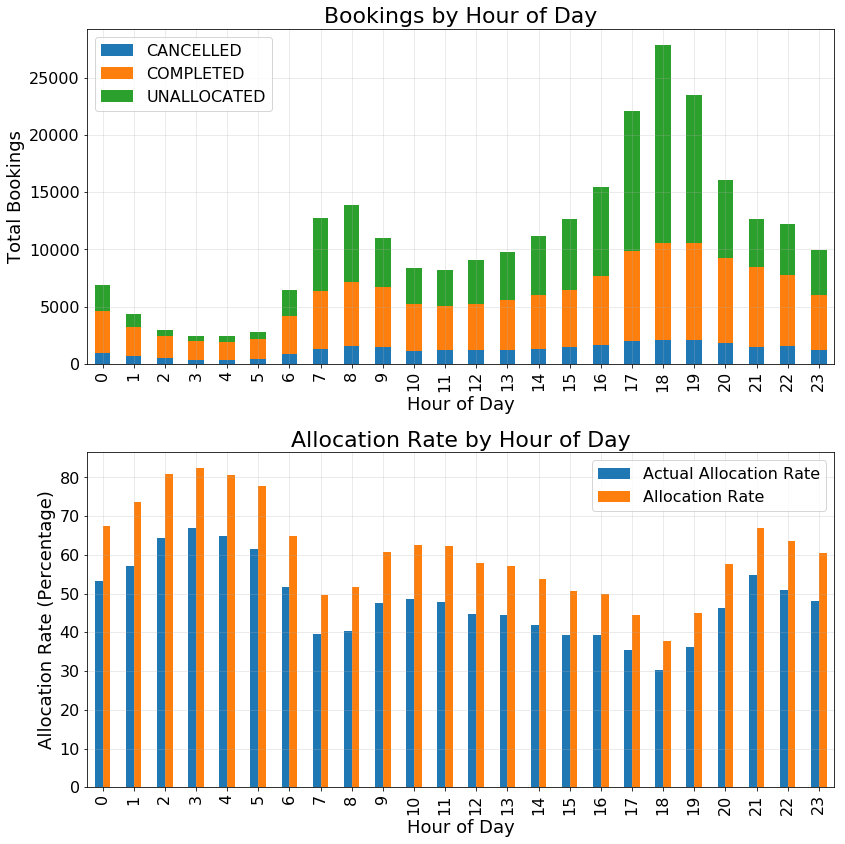

In [196]:
plt.figure(figsize=(12,12))
plt.subplot(211)
df_hour.iloc[:,0:3].plot(kind='bar', stacked=True, ax=plt.gca());
L=plt.legend()
L.get_texts()[0].set_text('CANCELLED')
L.get_texts()[1].set_text('COMPLETED')
L.get_texts()[2].set_text('UNALLOCATED')
plt.ylabel('Total Bookings', fontsize=18)
plt.xlabel('Hour of Day', fontsize=18)
plt.title('Bookings by Hour of Day', fontsize=22)
plt.grid(True, alpha=0.3)

plt.subplot(212)
df_hour.iloc[:,3:5].plot(kind='bar', stacked=False, ax=plt.gca());
M=plt.legend()
M.get_texts()[0].set_text('Actual Allocation Rate')
M.get_texts()[1].set_text('Allocation Rate')
plt.ylabel('Allocation Rate (Percentage)', fontsize=18)
plt.xlabel('Hour of Day', fontsize=18)
plt.title('Allocation Rate by Hour of Day', fontsize=22)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# <font color='668cff'><div style="text-align: justify"> In a 24-hour time frame, the busiest times are 7-9am and 4-8pm. Meanwhile, allocation rate drops during these peak hours. These show an inverse relationship between allocation rate and the total number of bookings.

# <font color='668cff'><div style="text-align: justify"> The efficiency of allocating vehicle for every passenger decreases as the demand for the service surges. Possible options to improve allocation rate during peak hours are to increase taxi supply and introduce new services like car pooling.  </font></div>


In [197]:
days = df.pivot_table(index=['day_of_week_num', 'state'], values='city', aggfunc='count')
df_days = days.to_frame()
df_days = df_days.unstack(level='state')
lbl = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_days['AAR'] = 100*df_days['city', 'COMPLETED']/(df_days['city', 'CANCELLED'] + df_days['city', 'COMPLETED'] + 
                                           df_days['city', 'UNALLOCATED'])
df_days['AR'] = 100*(df_days['city', 'COMPLETED'] + df_days['city', 'CANCELLED']) /(df_days['city', 'CANCELLED'] + 
                                           df_days['city', 'COMPLETED'] + df_days['city', 'UNALLOCATED'])

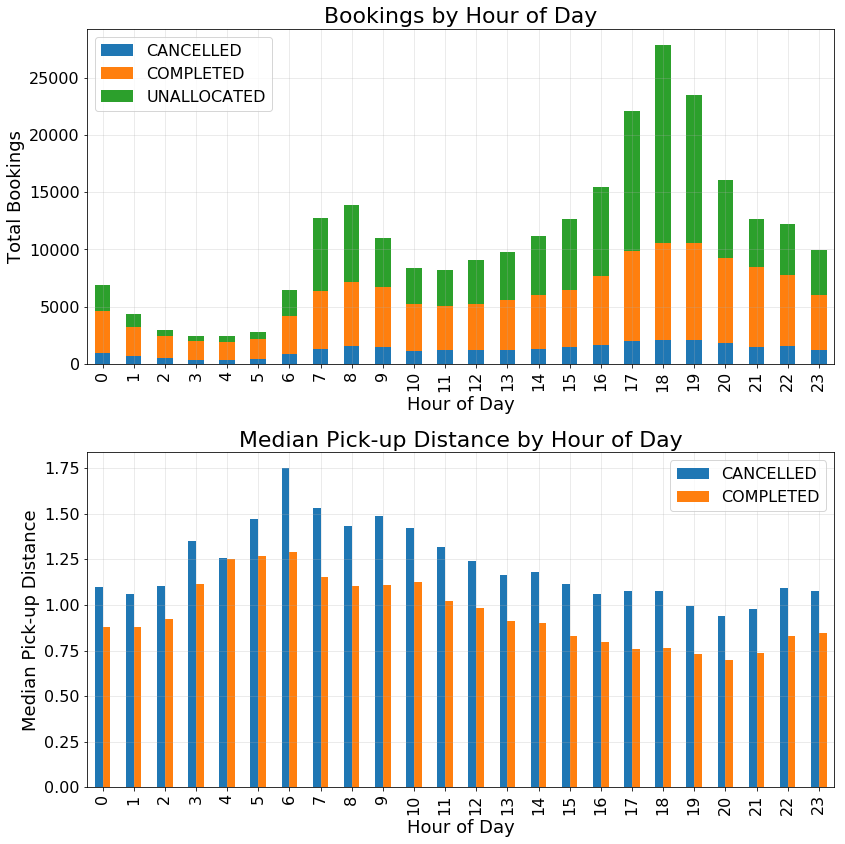

In [198]:
fare_weekday = df.pivot_table(index=['day_of_week_num', 'state'], values='fare', aggfunc='mean')
fare_hour = df.pivot_table(index=['hour_of_day', 'state'], values='pick_up_distance', aggfunc='median')
fare_hour = fare_hour .to_frame()
fare_hour = fare_hour.unstack(level='state')

plt.figure(figsize=(12,12))
plt.subplot(211)
df_hour.iloc[:,0:3].plot(kind='bar', stacked=True, ax=plt.gca());
L=plt.legend()
L.get_texts()[0].set_text('CANCELLED')
L.get_texts()[1].set_text('COMPLETED')
L.get_texts()[2].set_text('UNALLOCATED')
plt.ylabel('Total Bookings', fontsize=18)
plt.xlabel('Hour of Day', fontsize=18)
plt.title('Bookings by Hour of Day', fontsize=22)
plt.grid(True, alpha=0.3)


plt.subplot(212)
fare_hour.iloc[:,0:2].plot(kind='bar', stacked=False, ax=plt.gca())
M=plt.legend()
M.get_texts()[0].set_text('CANCELLED')
M.get_texts()[1].set_text('COMPLETED')
plt.ylabel('Median Pick-up Distance', fontsize=18)
plt.xlabel('Hour of Day', fontsize=18)
plt.title('Median Pick-up Distance by Hour of Day', fontsize=22)
plt.grid(True, alpha=0.3)

plt.tight_layout()

# <font color='668cff'><div style="text-align: justify"> Median pick-up distance is lowest during early evening rush hour. This means higher chance of booking cancellation during this period for allocations with longer pick-up distance. In contrast during early morning, pick-up distance has higher median value, suggesting that passengers are more tolerant for longer pick-up distance.

# <font color='668cff'><div style="text-align: justify"> This information could be used to improve the allocation algorithm by considering a wider pick-up distance range in the morning and shorter range in the evening. </font></div>


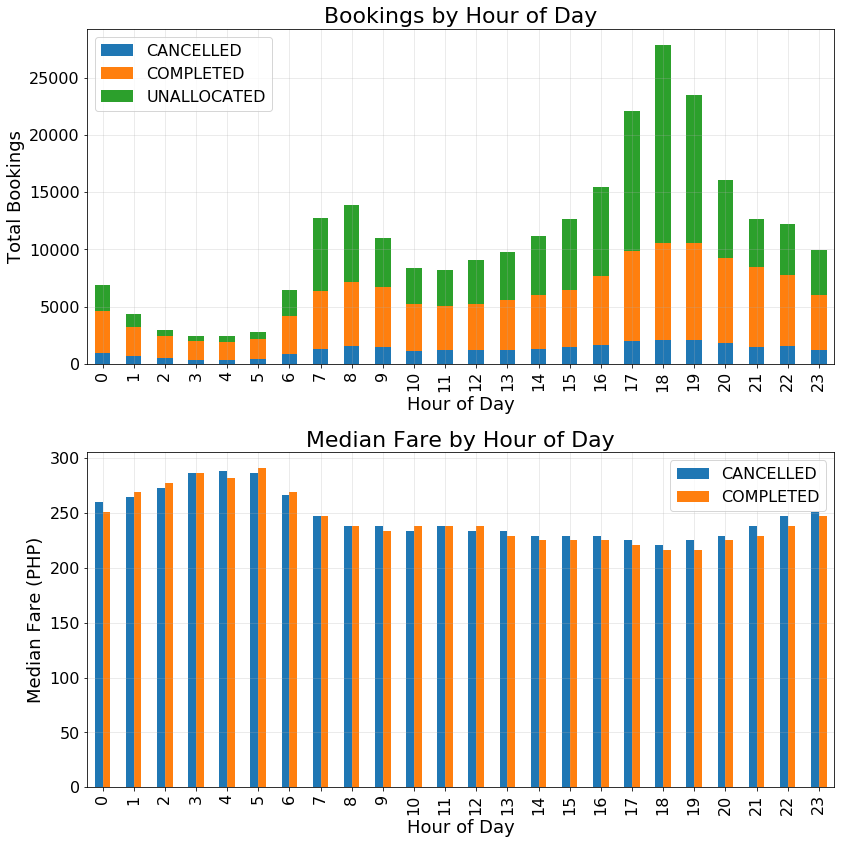

In [199]:
fare_weekday = df.pivot_table(index=['day_of_week_num', 'state'], values='fare', aggfunc='mean')
fare_hour = df.pivot_table(index=['hour_of_day', 'state'], values='fare', aggfunc='median')
fare_hour = fare_hour .to_frame()
fare_hour = fare_hour.unstack(level='state')

plt.figure(figsize=(12,12))
plt.subplot(211)
df_hour.iloc[:,0:3].plot(kind='bar', stacked=True, ax=plt.gca());
L=plt.legend()
L.get_texts()[0].set_text('CANCELLED')
L.get_texts()[1].set_text('COMPLETED')
L.get_texts()[2].set_text('UNALLOCATED')
plt.ylabel('Total Bookings', fontsize=18)
plt.xlabel('Hour of Day', fontsize=18)
plt.title('Bookings by Hour of Day', fontsize=22)
plt.grid(True, alpha=0.3)


plt.subplot(212)
fare_hour.iloc[:,0:2].plot(kind='bar', stacked=False, ax=plt.gca())
M=plt.legend()
M.get_texts()[0].set_text('CANCELLED')
M.get_texts()[1].set_text('COMPLETED')
plt.ylabel('Median Fare (PHP)', fontsize=18)
plt.xlabel('Hour of Day', fontsize=18)
plt.title('Median Fare by Hour of Day', fontsize=22)
plt.grid(True, alpha=0.3)

plt.tight_layout()

# <font color='668cff'><div style="text-align: justify"> Median fare surges during early morning, and stays almost flat until evening.

# <font color='668cff'><div style="text-align: justify"> In summary during early morning, allocation rate is highest, median pick-up distance is highest and median fare is also highest. These suggest that passengers are more willing to avail a grab vehicle during this time period with lower consideration for pick-up distance and fare price. Possible explanation for this include uncertainty in safety and availability of alternative transport services.  </font></div>

# <font color='668cff'><div style="text-align: justify"> Grab can use this idea to emphasize that it is the safest and most convenient option to travel especially during this time of the day.  </font></div>

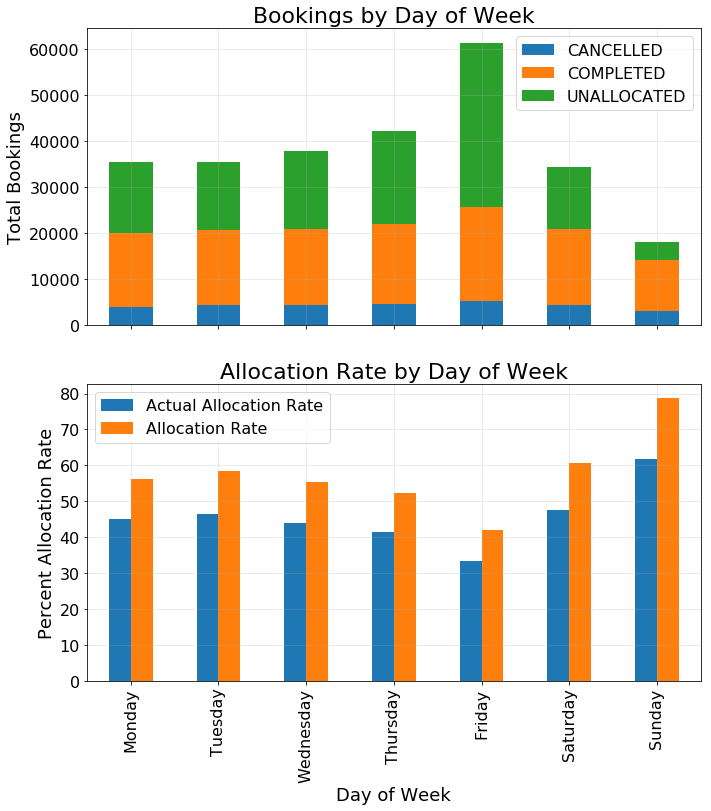

In [200]:
plt.figure(figsize=(11,12))
plt.subplot(211)
ax = df_days.iloc[:,0:3].plot(kind='bar', stacked=True, ax=plt.gca());
L=plt.legend()
L.get_texts()[0].set_text('CANCELLED')
L.get_texts()[1].set_text('COMPLETED')
L.get_texts()[2].set_text('UNALLOCATED')
ax.tick_params(labelbottom='off') 
plt.ylabel('Total Bookings', fontsize=18)
ax.xaxis.label.set_visible(False)
plt.title('Bookings by Day of Week', fontsize=22)
plt.grid(True, alpha=0.3)

plt.subplot(212)
ax = df_days.iloc[:,3:5].plot(kind='bar', stacked=False, ax=plt.gca());
M=plt.legend()
M.get_texts()[0].set_text('Actual Allocation Rate')
M.get_texts()[1].set_text('Allocation Rate')
ax.set_xticklabels(lbl, rotation=90)
plt.ylabel('Percent Allocation Rate', fontsize=18)
plt.xlabel('Day of Week', fontsize=18)
plt.title('Allocation Rate by Day of Week', fontsize=22)
plt.grid(True, alpha=0.3)

# <font color='668cff'><div style="text-align: justify"> Friday is the busiest day of the week based on total number of bookings. It is also during Friday where Actual Allocation rate is lowest. On the other hand, least number of booking occurs on Sunday which also has the highest Actual Allocation Rate.

# <font color='668cff'><div style="text-align: justify"> Similar to the hourly graphs, the efficiency of allocating vehicle for every passenger also decreases as the demand for the service surges. </font></div>


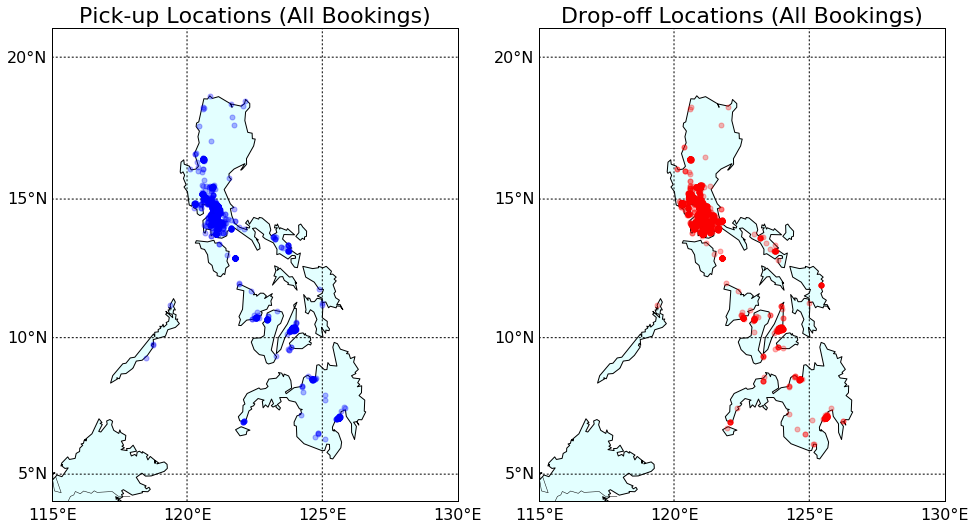

In [201]:
plt.figure(figsize=(16,12))
plt.subplot(121)
my_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=115, llcrnrlat=4,
    urcrnrlon=130, urcrnrlat=21)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='cyan', alpha=0.11)
my_map.drawmapboundary() 
my_map.drawmeridians(np.arange(0, 360, 5), labels=[1,0,0,1])
my_map.drawparallels(np.arange(-90, 90, 5),labels=[1,0,0,1])

lons = list(df.pick_up_longitude)
lats = list(df.pick_up_latitude)
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=5, alpha=0.3)
plt.title('Pick-up Locations (All Bookings)', fontsize=22)

#drop_off
plt.subplot(122)
my_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=115, llcrnrlat=4,
    urcrnrlon=130, urcrnrlat=21)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='cyan', alpha=0.11)
my_map.drawmapboundary() 
my_map.drawmeridians(np.arange(0, 360, 5), labels=[1,0,0,1])
my_map.drawparallels(np.arange(-90, 90, 5),labels=[1,0,0,1])
lons = list(df.drop_off_longitude)
lats = list(df.drop_off_latitude)
x,y = my_map(lons, lats)
my_map.plot(x, y, 'ro', markersize=5, alpha=0.3)
plt.title('Drop-off Locations (All Bookings)', fontsize=22);

# <font color='668cff'><div style="text-align: justify"> We can also look at the dataset in term of locations where Grab service was requested. Pick-up (left figure with blue circles) and drop-off locations (right figure with red circles) are concentrated in Metro Manila with some scattered bookings in other major cities across the Philippines. </font></div>

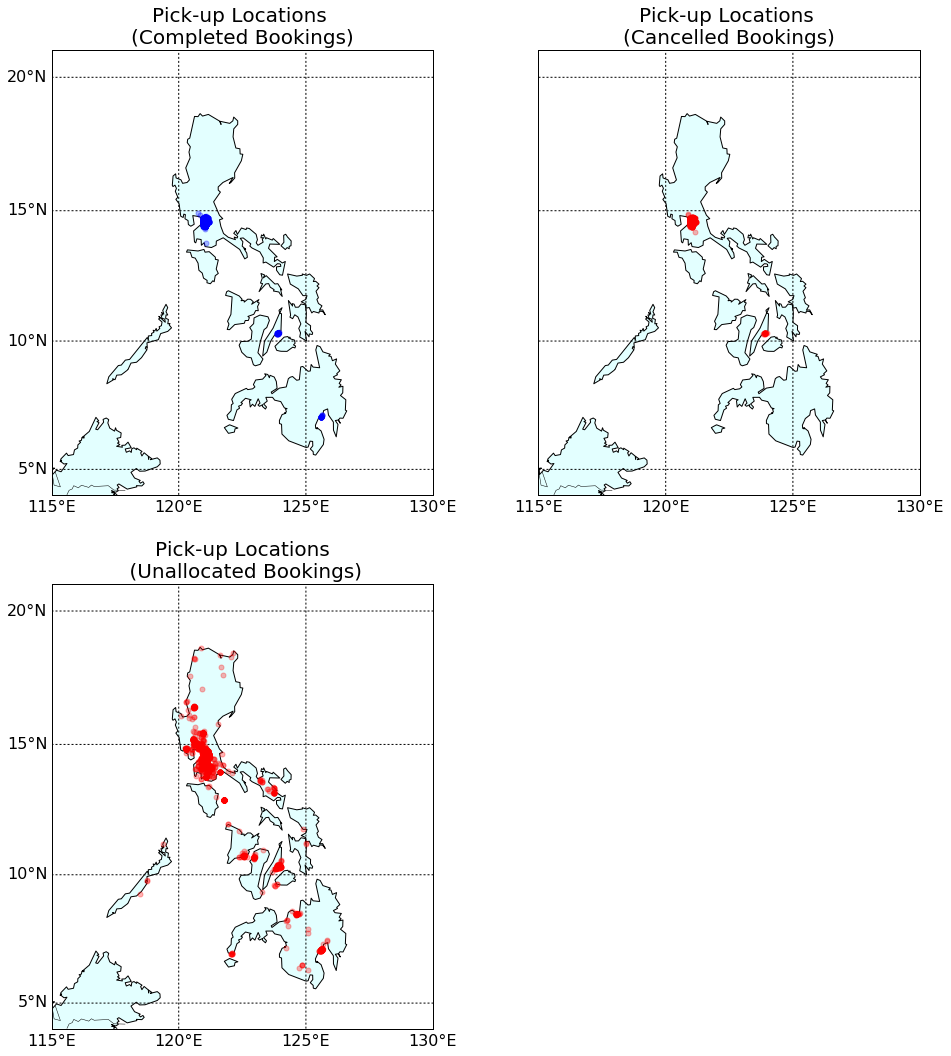

In [202]:
plt.figure(figsize=(16,18))
plt.subplot(221)
my_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=115, llcrnrlat=4,
    urcrnrlon=130, urcrnrlat=21)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='cyan', alpha=0.11)
my_map.drawmapboundary() 
my_map.drawmeridians(np.arange(0, 360, 5), labels=[1,0,0,1])
my_map.drawparallels(np.arange(-90, 90, 5),labels=[1,0,0,1])

lons = list(df.pick_up_longitude[df['state']=='COMPLETED'])
lats = list(df.pick_up_latitude[df['state']=='COMPLETED'])
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=5, alpha=0.3)
plt.title('Pick-up Locations \n(Completed Bookings)', fontsize=20)

#CANCELLED
plt.subplot(222)
my_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=115, llcrnrlat=4,
    urcrnrlon=130, urcrnrlat=21)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='cyan', alpha=0.11)
my_map.drawmapboundary() 
my_map.drawmeridians(np.arange(0, 360, 5), labels=[0,0,0,1])
my_map.drawparallels(np.arange(-90, 90, 5),labels=[0,0,0,1])
lons = list(df.pick_up_longitude[df['state']=='CANCELLED'])
lats = list(df.pick_up_latitude[df['state']=='CANCELLED'])
x,y = my_map(lons, lats)
my_map.plot(x, y, 'ro', markersize=5, alpha=0.3)
plt.title('Pick-up Locations \n(Cancelled Bookings)', fontsize=20);

#UNALLOCATED
plt.subplot(223)
my_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=115, llcrnrlat=4,
    urcrnrlon=130, urcrnrlat=21) 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='cyan', alpha=0.11)
my_map.drawmapboundary() 
my_map.drawmeridians(np.arange(0, 360, 5), labels=[1,0,0,1])
my_map.drawparallels(np.arange(-90, 90, 5),labels=[1,0,0,1])
lons = list(df.pick_up_longitude[df['state']=='UNALLOCATED'])
lats = list(df.pick_up_latitude[df['state']=='UNALLOCATED'])
x,y = my_map(lons, lats)
my_map.plot(x, y, 'ro', markersize=5, alpha=0.3)
plt.title('Pick-up Locations\n (Unallocated Bookings)', fontsize=20);

# <font color='668cff'><div style="text-align: justify"> Only bookings within Metro Manila, Cebu and Davao were completed. Bookings from other cities (e.g. Baguio, Olongapo, Batangas, Lucena, Legazpi, Iloilo, Bacolod, Tagbilaran, Cagayan de Oro and Zamboanga) were unallocated. These urban areas are low hanging fruits for expansion and development. </font></div>